In [1]:
!wget https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v1.0.tar.gz

--2021-03-04 07:21:45--  https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v1.0.tar.gz
Resolving crisisnlp.qcri.org (crisisnlp.qcri.org)... 80.76.166.234
Connecting to crisisnlp.qcri.org (crisisnlp.qcri.org)|80.76.166.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1901224486 (1.8G) [application/x-gzip]
Saving to: ‘CrisisMMD_v1.0.tar.gz’

CrisisMMD_v1.0.tar. 100%[===================>]   1.77G  7.20MB/s    in 4m 11s  

2021-03-04 07:25:57 (7.23 MB/s) - ‘CrisisMMD_v1.0.tar.gz’ saved [1901224486/1901224486]



In [2]:
!tar -xf *.tar.gz
!rm *.tar.gz

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Concatenate, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform, glorot_normal
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.utils import class_weight
import random

In [2]:
a = pd.read_table('annotations/california_wildfires_final_data.tsv')

In [3]:
a = a.dropna(axis=0, subset=['image_human'])

In [4]:
imgloclist = list(a['image_path'])

In [5]:
imgloclist[0]

'data_image/california_wildfires/10_10_2017/917791044158185473_0.jpg'

In [6]:
imglist = []
for imgloc in imgloclist:
    i = cv2.imread(imgloc)
    imglist.append(cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC))

In [7]:
X = np.array(imglist)

In [8]:
shapelist = []
for img in imglist:
    shapelist.append(img.shape)
k = list(shapelist[0])
for s in shapelist:
    for i in range(3):
        k[i] = k[i] + s[i]
for i in range(3):
    k[i] = k[i] - shapelist[0][i]
    k[i] = k[i]/1307
print(k)

[224.0, 224.0, 3.0]


In [9]:
len(imglist)

1307

In [10]:
set(list(a['image_human']))

{'affected_individuals',
 'infrastructure_and_utility_damage',
 'injured_or_dead_people',
 'missing_or_found_people',
 'not_relevant_or_cant_judge',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort',
 'vehicle_damage'}

In [11]:
labellist = []
clas0list = []
clas1list = []
clas2list = []
clas3list = []
clas4list = []
clas5list = []
clas6list = []
clas7list = []
i = 0
for label in list(a['image_human']):
    if label == 'not_relevant_or_cant_judge':
        labellist.append(0)
        clas0list.append(imglist[i])
    elif label == 'infrastructure_and_utility_damage':
        labellist.append(1)
        clas1list.append(imglist[i])
    elif label == 'affected_individuals':
        labellist.append(2)
        clas2list.append(imglist[i])
    elif label == 'injured_or_dead_people':
        labellist.append(3)
        clas3list.append(imglist[i])
    elif label == 'missing_or_found_people':
        labellist.append(4)
        clas4list.append(imglist[i])
    elif label == 'rescue_volunteering_or_donation_effort':
        labellist.append(5)
        clas5list.append(imglist[i])
    elif label == 'vehicle_damage':
        labellist.append(6)
        clas6list.append(imglist[i])
    elif label == 'other_relevant_information':
        labellist.append(7)
        clas7list.append(imglist[i])
    i+=1
labellist = np.array(labellist)

In [12]:
X_input = []
Y_input = []

In [13]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas0list))

X_0 = []
k = 0
for X1 in datagen.flow(x=np.array(clas0list)):
    l = 0
    for i in X1:
        X_0.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(0)
        k+=1
        l+=1
    if k >= 2000:
        break
X_0 = np.array(X_0)

In [14]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas1list))

X_1 = []
k = 0
for X1 in datagen.flow(x=np.array(clas1list)):
    l = 0
    for i in X1:
        X_1.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(1)
        k+=1
        l+=1
    if k >= 2000:
        break
X_1 = np.array(X_1)

In [15]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas2list))

X_2 = []
k = 0
for X1 in datagen.flow(x=np.array(clas2list)):
    l = 0
    for i in X1:
        X_2.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(2)
        k+=1
        l+=1
    if k >= 2000:
        break
X_2 = np.array(X_2)

In [16]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas3list))

X_3 = []
k = 0
for X1 in datagen.flow(x=np.array(clas3list)):
    l = 0
    for i in X1:
        X_3.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(3)
        k+=1
        l+=1
    if k >= 2000:
        break
X_3 = np.array(X_3)

In [17]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas4list))

X_4 = []
k = 0
for X1 in datagen.flow(x=np.array(clas4list)):
    l = 0
    for i in X1:
        X_4.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(4)
        k+=1
        l+=1
    if k >= 2000:
        break
X_4 = np.array(X_4)

In [18]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas5list))

X_5 = []
k = 0
for X1 in datagen.flow(x=np.array(clas5list)):
    l = 0
    for i in X1:
        X_5.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(5)
        k+=1
        l+=1
    if k >= 2000:
        break
X_5 = np.array(X_5)

In [19]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas6list))

X_6 = []
k = 0
for X1 in datagen.flow(x=np.array(clas6list)):
    l = 0
    for i in X1:
        X_6.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(6)
        k+=1
        l+=1
    if k >= 2000:
        break
X_6 = np.array(X_6)

In [20]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas7list))

X_7 = []
k = 0
for X1 in datagen.flow(x=np.array(clas7list)):
    l = 0
    for i in X1:
        X_7.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(7)
        k+=1
        l+=1
    if k >= 2000:
        break
X_7 = np.array(X_7)

In [21]:
random.seed(221)
random.shuffle(X_input)
random.seed(221)
random.shuffle(Y_input)
X_input = np.array(X_input)
Y_input = np.array(Y_input)

In [22]:
len(Y_input)

16117

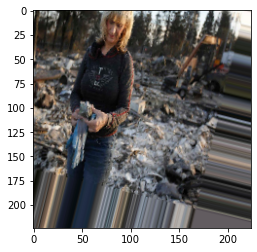

In [23]:
plt.imshow(cv2.cvtColor(X_2[2], cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
def shallownet(input_shape = (224, 224, 3, ), classes = 8):
    X_input = Input(input_shape)
    X = Conv2D(64, (7, 7), strides = (4, 4), name = 'conv1', kernel_initializer = glorot_uniform())(X_input)
    X = Conv2D(32, (8, 8), strides = (2, 2), name = 'conv2', kernel_initializer = glorot_uniform())(X)
    X = Conv2D(64, (7, 7), strides = (5, 5), name = 'conv3', kernel_initializer = glorot_uniform())(X)
    X = Conv2D(16, (2, 2), strides = (2, 2), name = 'conv4', kernel_initializer = glorot_uniform())(X)
    #X = Conv2D(16, (2, 2), strides = (1, 1), name = 'conv5', kernel_initializer = glorot_uniform())(X)
    X = Flatten()(X)
    X = Dense(144, activation = 'relu')(X)
    #X = Dense(64, activation = 'relu')(X)
    X = Dense(classes, activation = 'softmax')(X)
    model = Model(inputs = X_input, outputs = X)
    return model

In [25]:
model = shallownet()

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 55, 55, 64)        9472      
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 32)        131104    
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          100416    
_________________________________________________________________
conv4 (Conv2D)               (None, 2, 2, 16)          4112      
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 144)               9360  

In [27]:
X_input.shape

(16117, 224, 224, 3)

In [28]:
shistory = model.fit(X_input, Y_input, epochs = 60, validation_split = 0.15)

Train on 13699 samples, validate on 2418 samples
Epoch 1/60
13699/13699 [==============================] - 9s 627us/sample - loss: 10.5392 - accuracy: 0.2388 - val_loss: 3.0839 - val_accuracy: 0.2663
Epoch 2/60
13699/13699 [==============================] - 5s 334us/sample - loss: 2.0991 - accuracy: 0.3648 - val_loss: 2.3028 - val_accuracy: 0.3110
Epoch 3/60
13699/13699 [==============================] - 5s 334us/sample - loss: 1.5315 - accuracy: 0.4646 - val_loss: 2.3365 - val_accuracy: 0.3073
Epoch 4/60
13699/13699 [==============================] - 5s 333us/sample - loss: 1.2957 - accuracy: 0.5422 - val_loss: 2.3510 - val_accuracy: 0.3189
Epoch 5/60
13699/13699 [==============================] - 5s 335us/sample - loss: 1.2325 - accuracy: 0.5720 - val_loss: 2.6215 - val_accuracy: 0.3048
Epoch 6/60
13699/13699 [==============================] - 5s 333us/sample - loss: 1.4023 - accuracy: 0.5382 - val_loss: 2.6626 - val_accuracy: 0.3077
Epoch 7/60
13699/13699 [==========================

In [29]:
model.evaluate(X, labellist)

1307/1307 [==============================] - 0s 193us/sample - loss: 2.0787 - accuracy: 0.0436


[2.0787475222198672, 0.043611325]

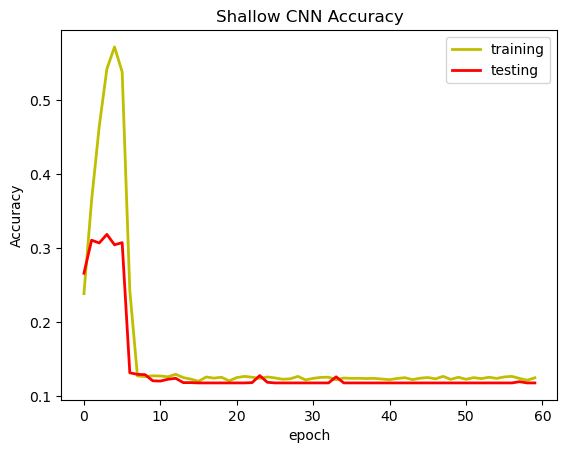

In [30]:
plt.rcParams.update({'font.size': 13})
plt.rcParams["figure.figsize"] = [5, 5]
plt.style.use(['default'])
plt.plot(shistory.history['accuracy'], c='y',linewidth=2.0)
plt.plot(shistory.history['val_accuracy'], c='r',linewidth=2.0)
plt.title('Shallow CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

In [31]:
res = ResNet50(weights = None, classes = 8)

In [32]:
res.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [33]:
history = res.fit(X_input, Y_input, epochs = 60, validation_split = 0.15)

Train on 13699 samples, validate on 2418 samples
Epoch 1/60
13699/13699 [==============================] - 137s 10ms/sample - loss: 1.4821 - accuracy: 0.4723 - val_loss: 2.2457 - val_accuracy: 0.2763
Epoch 2/60
13699/13699 [==============================] - 129s 9ms/sample - loss: 1.1172 - accuracy: 0.5813 - val_loss: 1.2005 - val_accuracy: 0.5414
Epoch 3/60
13699/13699 [==============================] - 129s 9ms/sample - loss: 0.9435 - accuracy: 0.6406 - val_loss: 1.1195 - val_accuracy: 0.6042
Epoch 4/60
13699/13699 [==============================] - 130s 9ms/sample - loss: 0.8472 - accuracy: 0.6780 - val_loss: 1.0520 - val_accuracy: 0.6104
Epoch 5/60
13699/13699 [==============================] - 131s 10ms/sample - loss: 0.7191 - accuracy: 0.7252 - val_loss: 0.6131 - val_accuracy: 0.7589
Epoch 6/60
13699/13699 [==============================] - 133s 10ms/sample - loss: 0.6512 - accuracy: 0.7537 - val_loss: 1.2921 - val_accuracy: 0.6336
Epoch 7/60
13699/13699 [========================

In [34]:
res.evaluate(X, labellist)

1307/1307 [==============================] - 4s 3ms/sample - loss: 0.3144 - accuracy: 0.9273


[0.3143681259148889, 0.92731446]

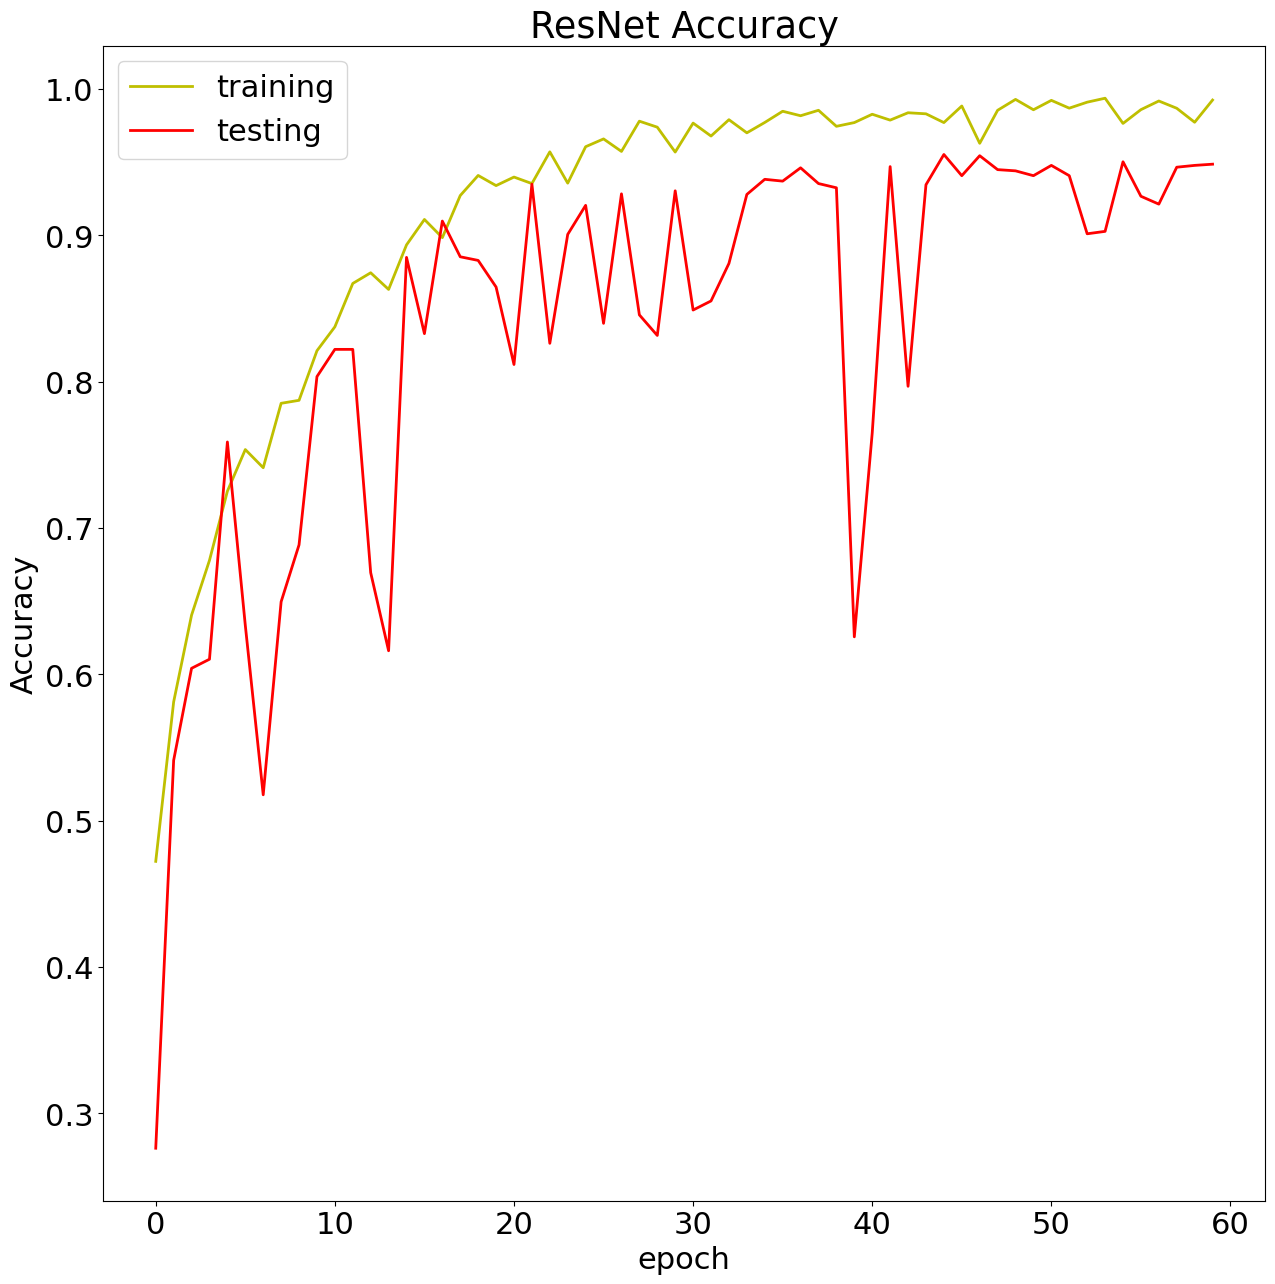

In [36]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(history.history['accuracy'], c='y',linewidth=2.0)
plt.plot(history.history['val_accuracy'], c='r',linewidth=2.0)
plt.title('ResNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

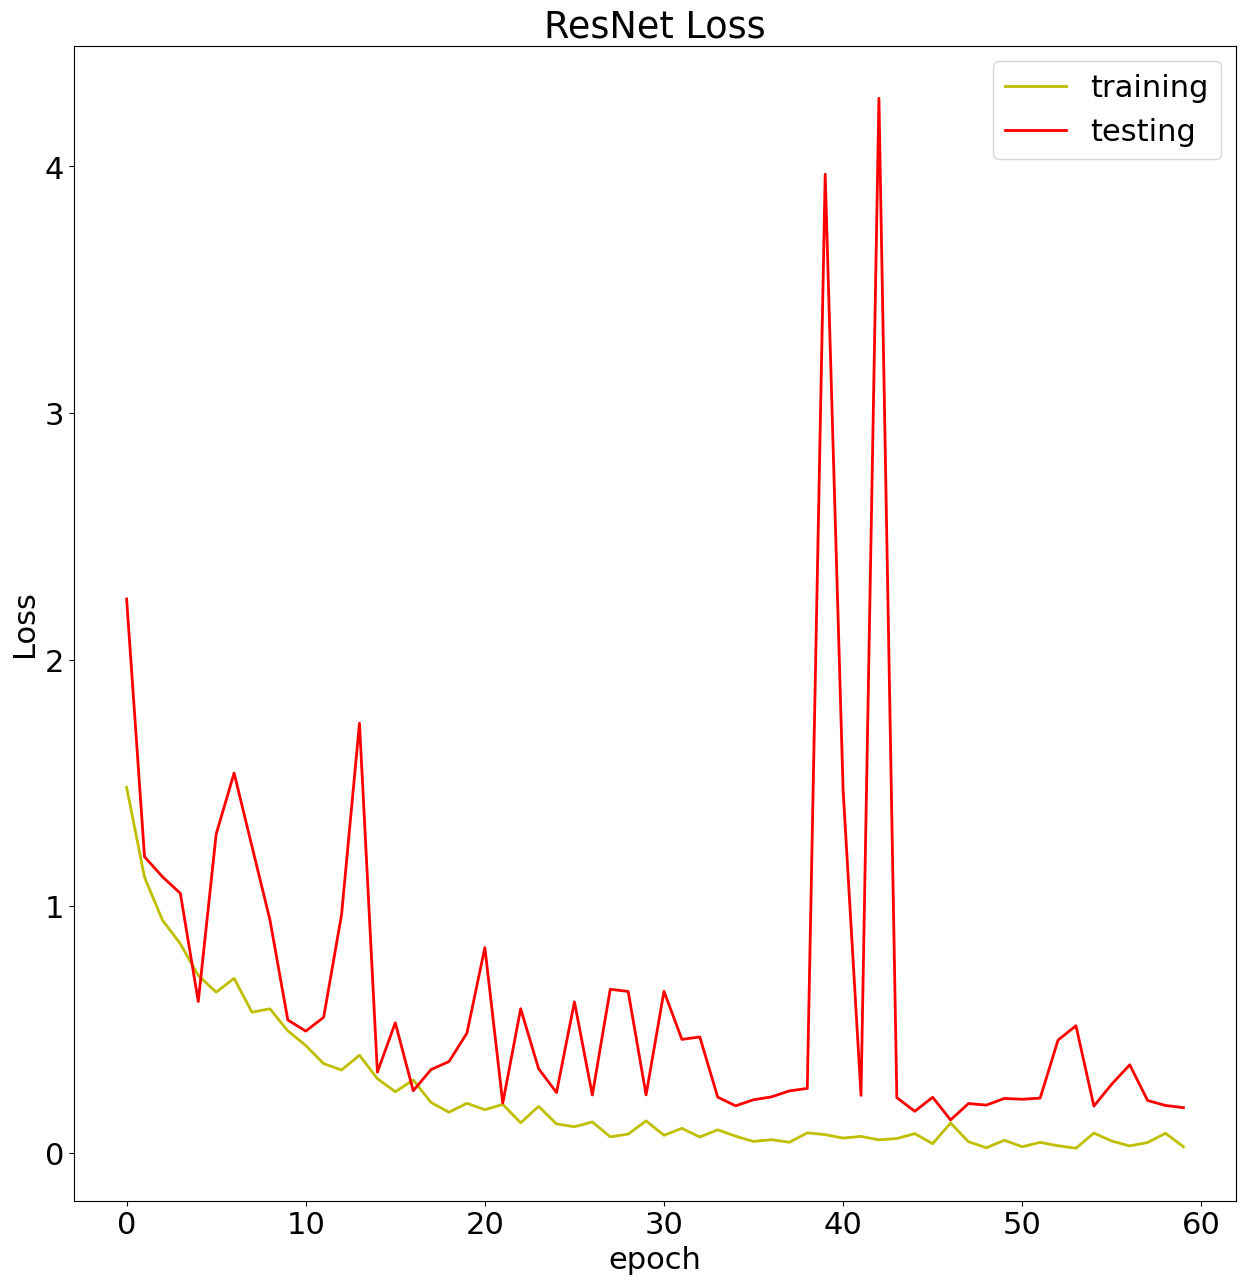

In [37]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(history.history['loss'], c='y',linewidth=2.0)
plt.plot(history.history['val_loss'], c='r',linewidth=2.0)
plt.title('ResNet Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

In [22]:
def _fire(X, filters, name="fire"):
    sq_filters, ex1_filters, ex2_filters = filters
    squeeze = Conv2D(sq_filters, (1, 1), activation='relu', padding='same', name=name + "/squeeze1x1")(X)
    expand1 = Conv2D(ex1_filters, (1, 1), activation='relu', padding='same', name=name + "/expand1x1")(squeeze)
    expand2 = Conv2D(ex2_filters, (3, 3), activation='relu', padding='same', name=name + "/expand3x3")(squeeze)
    X = Concatenate(axis=-1, name=name)([expand1, expand2])
    return X

In [23]:
def SqueezeNet(input_shape = (224, 224, 3, ), classes = 8):
    X_input = Input(input_shape)

    X = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu", name='conv1')(X_input)
    X = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='maxpool1', padding="valid")(X)

    X = _fire(X, (16, 64, 64), name="fire2")
    X = _fire(X, (16, 64, 64), name="fire3")

    X = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='maxpool3', padding="valid")(X)

    X = _fire(X, (32, 128, 128), name="fire4")
    X = _fire(X, (32, 128, 128), name="fire5")

    X = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='maxpool5', padding="valid")(X)

    X = _fire(X, (48, 192, 192), name="fire6")
    X = _fire(X, (48, 192, 192), name="fire7")

    X = _fire(X, (64, 256, 256), name="fire8")
    X = _fire(X, (64, 256, 256), name="fire9")
    X = Dropout(0.5, name='dropout9')(X)

    X = Conv2D(classes, (1, 1), padding='valid', name='conv10')(X)
    X = AveragePooling2D(pool_size=(13, 13), name='avgpool10')(X)
    X = Flatten(name='flatten10')(X)
    X = Activation("softmax", name='softmax')(X)
    model = Model(X_input, X, name="squeezenet")
    return model

In [24]:
sqnet = SqueezeNet()
sqnet.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sqnet.summary()

Model: "squeezenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 55, 55, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
fire2/squeeze1x1 (Conv2D)       (None, 55, 55, 16)   1040        maxpool1[0][0]                   
_________________________________________________________________________________________

In [25]:
sqhistory = sqnet.fit(X_input, Y_input, epochs = 60, validation_split = 0.15)

Train on 13699 samples, validate on 2418 samples
Epoch 1/60
13699/13699 [==============================] - 25s 2ms/sample - loss: 2.0697 - accuracy: 0.1340 - val_loss: 2.0937 - val_accuracy: 0.1257
Epoch 2/60
13699/13699 [==============================] - 20s 1ms/sample - loss: 2.0346 - accuracy: 0.1850 - val_loss: 2.6679 - val_accuracy: 0.1588
Epoch 3/60
13699/13699 [==============================] - 20s 1ms/sample - loss: 2.0347 - accuracy: 0.1832 - val_loss: 1.9911 - val_accuracy: 0.1745
Epoch 4/60
13699/13699 [==============================] - 20s 1ms/sample - loss: 1.9155 - accuracy: 0.2463 - val_loss: 1.9025 - val_accuracy: 0.2502
Epoch 5/60
13699/13699 [==============================] - 20s 1ms/sample - loss: 1.7652 - accuracy: 0.2984 - val_loss: 2.8374 - val_accuracy: 0.1452
Epoch 6/60
13699/13699 [==============================] - 20s 1ms/sample - loss: 1.6851 - accuracy: 0.3491 - val_loss: 1.9476 - val_accuracy: 0.1985
Epoch 7/60
13699/13699 [==============================] -

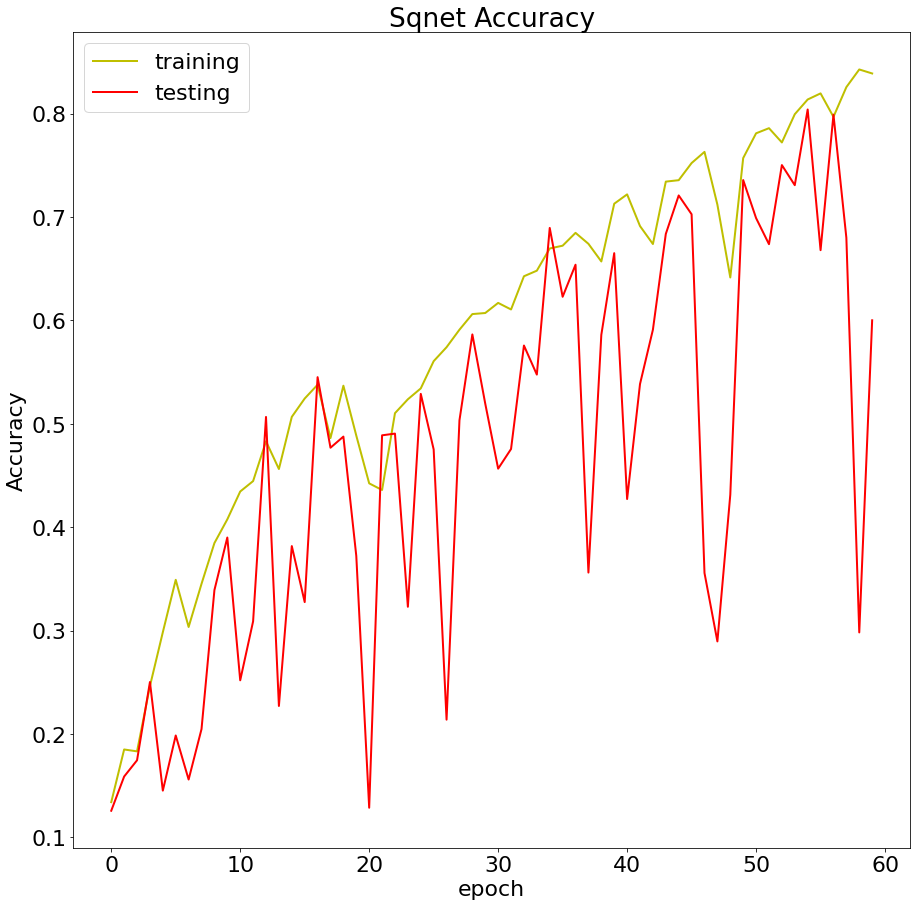

In [26]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(sqhistory.history['accuracy'], c='y',linewidth=2.0)
plt.plot(sqhistory.history['val_accuracy'], c='r',linewidth=2.0)
plt.title('Sqnet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

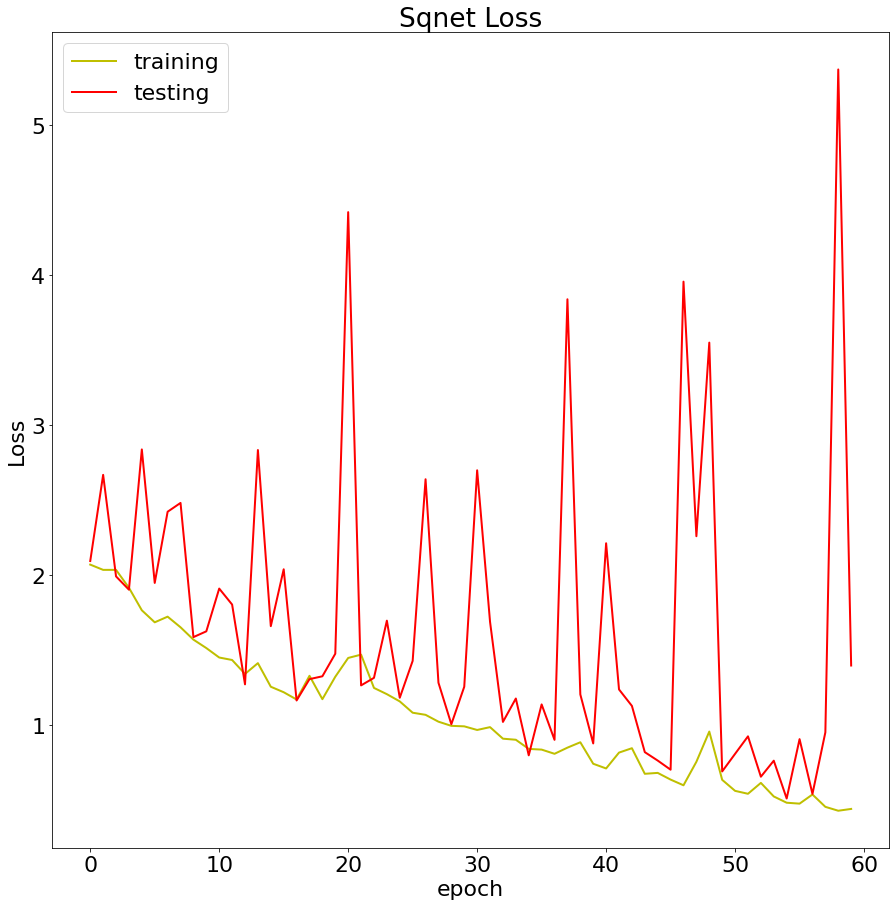

In [27]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(sqhistory.history['loss'], c='y',linewidth=2.0)
plt.plot(sqhistory.history['val_loss'], c='r',linewidth=2.0)
plt.title('Sqnet Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

In [28]:
sqnet.evaluate(X, labellist)

1307/1307 [==============================] - 1s 714us/sample - loss: 1.3176 - accuracy: 0.6282


[1.3176301736911928, 0.62815607]

In [ ]:
sqhistory.history['val_acc'][99]

0.9305210918607152

In [30]:
sqnet.save('sqnet_trained.tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: sqnet_trained.tf/assets


In [43]:
import pickle
with open('ResNet.pk1', 'wb') as f:
    pickle.dump(history.history, f)

In [36]:
Y_input.shape

(18128,)

In [31]:
ResNet = tf.keras.models.load_model('resnet_trained.h5')

In [33]:
ResNet.save('resnet_trained.tf')

INFO:tensorflow:Assets written to: resnet_trained.tf/assets
